In [222]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import preprocessing
from sklearn.decomposition import PCA
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
from sklearn.preprocessing import MinMaxScaler,StandardScaler

# 4.1 Data exploration (A)

In [223]:
df = pd.read_csv("./Resource/CarPrice.csv")
df

,car_ID,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,...,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,1,3,alfa-romero giulia,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0
1,2,3,alfa-romero stelvio,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0
2,3,1,alfa-romero Quadrifoglio,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0
3,4,2,audi 100 ls,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.0
4,5,2,audi 100ls,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
200,201,-1,volvo 145e (sw),gas,std,four,sedan,rwd,front,109.1,...,141,mpfi,3.78,3.15,9.5,114,5400,23,28,16845.0
201,202,-1,volvo 144ea,gas,turbo,four,sedan,rwd,front,109.1,...,141,mpfi,3.78,3.15,8.7,160,5300,19,25,19045.0
202,203,-1,volvo 244dl,gas,std,four,sedan,rwd,front,109.1,...,173,mpfi,3.58,2.87,8.8,134,5500,18,23,21485.0
203,204,-1,volvo 246,diesel,turbo,four,sedan,rwd,front,109.1,...,145,idi,3.01,3.40,23.0,106,4800,26,27,22470.0


In [224]:
df = df.drop(['car_ID','CarName'] , axis=1)

In [225]:
df.head()

,symboling,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,carlength,carwidth,...,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,3,gas,std,two,convertible,rwd,front,88.6,168.8,64.1,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0
1,3,gas,std,two,convertible,rwd,front,88.6,168.8,64.1,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0
2,1,gas,std,two,hatchback,rwd,front,94.5,171.2,65.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0
3,2,gas,std,four,sedan,fwd,front,99.8,176.6,66.2,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.0
4,2,gas,std,four,sedan,4wd,front,99.4,176.6,66.4,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.0


> find null values

In [226]:
null_data = df[df.isnull().any(axis=1)]
null_data

,symboling,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,carlength,carwidth,...,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price


In [227]:
df.describe()

,symboling,wheelbase,carlength,carwidth,carheight,curbweight,enginesize,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
count,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000
mean,0.834146,98.756585,174.049268,65.907805,53.724878,2555.565854,126.907317,3.329756,3.255415,10.142537,104.117073,5125.121951,25.219512,30.751220,13276.710571
std,1.245307,6.021776,12.337289,2.145204,2.443522,520.680204,41.642693,0.270844,0.313597,3.972040,39.544167,476.985643,6.542142,6.886443,7988.852332
min,-2.000000,86.600000,141.100000,60.300000,47.800000,1488.000000,61.000000,2.540000,2.070000,7.000000,48.000000,4150.000000,13.000000,16.000000,5118.000000
25%,0.000000,94.500000,166.300000,64.100000,52.000000,2145.000000,97.000000,3.150000,3.110000,8.600000,70.000000,4800.000000,19.000000,25.000000,7788.000000
50%,1.000000,97.000000,173.200000,65.500000,54.100000,2414.000000,120.000000,3.310000,3.290000,9.000000,95.000000,5200.000000,24.000000,30.000000,10295.000000
75%,2.000000,102.400000,183.100000,66.900000,55.500000,2935.000000,141.000000,3.580000,3.410000,9.400000,116.000000,5500.000000,30.000000,34.000000,16503.000000
max,3.000000,120.900000,208.100000,72.300000,59.800000,4066.000000,326.000000,3.940000,4.170000,23.000000,288.000000,6600.000000,49.000000,54.000000,45400.000000


# 4.1 Data Transform and Feature Selection  (b)

In [228]:
#get numeric features to list
numeric_feat = df.select_dtypes(include=np.number).columns.tolist()
numeric_feat

['symboling',
 'wheelbase',
 'carlength',
 'carwidth',
 'carheight',
 'curbweight',
 'enginesize',
 'boreratio',
 'stroke',
 'compressionratio',
 'horsepower',
 'peakrpm',
 'citympg',
 'highwaympg',
 'price']

In [229]:
std = StandardScaler()

In [230]:
df[numeric_feat] = std.fit_transform(df[numeric_feat])

In [231]:
df.describe()

,symboling,wheelbase,carlength,carwidth,carheight,curbweight,enginesize,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
count,2.050000e+02,2.050000e+02,2.050000e+02,2.050000e+02,2.050000e+02,2.050000e+02,2.050000e+02,2.050000e+02,2.050000e+02,2.050000e+02,2.050000e+02,2.050000e+02,2.050000e+02,2.050000e+02,2.050000e+02
mean,5.848980e-17,-1.496906e-15,3.730349e-15,9.964929e-16,-4.408398e-16,9.910771e-17,5.415722e-19,2.267021e-15,2.126483e-15,-3.115394e-16,1.914458e-16,6.553024e-17,1.104807e-16,1.743863e-16,1.581391e-16
std,1.002448e+00,1.002448e+00,1.002448e+00,1.002448e+00,1.002448e+00,1.002448e+00,1.002448e+00,1.002448e+00,1.002448e+00,1.002448e+00,1.002448e+00,1.002448e+00,1.002448e+00,1.002448e+00,1.002448e+00
min,-2.281433e+00,-2.023713e+00,-2.677244e+00,-2.620512e+00,-2.430664e+00,-2.055348e+00,-1.586561e+00,-2.923049e+00,-3.789311e+00,-7.931011e-01,-1.422573e+00,-2.049347e+00,-1.872388e+00,-2.147310e+00,-1.023762e+00
25%,-6.714717e-01,-7.085959e-01,-6.296552e-01,-8.447824e-01,-7.076263e-01,-7.904486e-01,-7.199469e-01,-6.653141e-01,-4.648342e-01,-3.892993e-01,-8.648707e-01,-6.832865e-01,-9.530117e-01,-8.371954e-01,-6.887281e-01
50%,1.335090e-01,-2.924196e-01,-6.900603e-02,-1.905661e-01,1.538927e-01,-2.725519e-01,-1.662771e-01,-7.312136e-02,1.105560e-01,-2.883489e-01,-2.311186e-01,1.573661e-01,-1.868650e-01,-1.093538e-01,-3.741476e-01
75%,9.384897e-01,6.065210e-01,7.354037e-01,4.636501e-01,7.282388e-01,7.305117e-01,3.392475e-01,9.262039e-01,4.941494e-01,-1.873985e-01,3.012332e-01,7.878555e-01,7.325109e-01,4.729195e-01,4.048375e-01
max,1.743470e+00,3.686225e+00,2.766741e+00,2.987056e+00,2.492302e+00,2.907988e+00,4.792679e+00,2.258638e+00,2.923575e+00,3.244916e+00,4.661448e+00,3.099650e+00,3.643868e+00,3.384286e+00,4.030858e+00


In [232]:
only_numeric = df[numeric_feat]

In [233]:
only_numeric_corr = only_numeric.corr()

<AxesSubplot:>

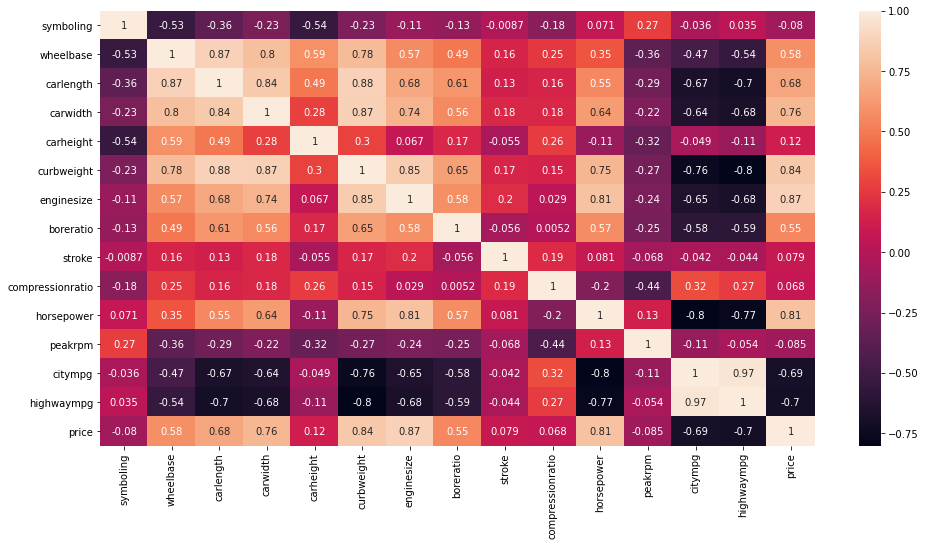

In [81]:
plt.figure(figsize=(16,8))
sns.heatmap(only_numeric_corr,annot=True )

In [ ]:
sns.pairplot(only_numeric, hue='symboling' , kind='reg' ,
            plot_kws={"line_kws": {"color":"red"}})

C:\Users\ACER-OAT\anaconda3\lib\site-packages\seaborn\distributions.py:306: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)
C:\Users\ACER-OAT\anaconda3\lib\site-packages\seaborn\distributions.py:306: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)
C:\Users\ACER-OAT\anaconda3\lib\site-packages\seaborn\distributions.py:306: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)
C:\Users\ACER-OAT\anaconda3\lib\site-packages\seaborn\distributions.py:306: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)
C:\Users\ACER-OAT\anaconda3\lib\site-packages\seaborn\distributions.py:306: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)


In [114]:
lower_cor = pd.DataFrame(np.tril(only_numeric_corr, -1), columns = only_numeric_corr.columns)
lower_cor

,symboling,wheelbase,carlength,carwidth,carheight,curbweight,enginesize,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0
1,-0.531954,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0
2,-0.357612,0.874587,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0
3,-0.232919,0.795144,0.841118,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0
4,-0.541038,0.589435,0.491029,0.279210,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0
5,-0.227691,0.776386,0.877728,0.867032,0.295572,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0
6,-0.105790,0.569329,0.683360,0.735433,0.067149,0.850594,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0
7,-0.130051,0.488750,0.606454,0.559150,0.171071,0.648480,0.583774,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0
8,-0.008735,0.160959,0.129533,0.182942,-0.055307,0.168790,0.203129,-0.055909,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0
9,-0.178515,0.249786,0.158414,0.181129,0.261214,0.151362,0.028971,0.005197,0.186110,0.000000,0.000000,0.000000,0.000000,0.000000,0.0


> #### Drop features that correlation > |0.86|

In [115]:
to_drop = [column for column in lower_cor if any(lower_cor[column] > abs(0.86) )]
to_drop

['wheelbase', 'carlength', 'carwidth', 'enginesize', 'citympg']

In [116]:
df = df.drop(to_drop ,axis=1)

In [131]:
df

,symboling,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,carheight,curbweight,enginetype,cylindernumber,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,highwaympg,price
0,1.743470,gas,std,two,convertible,rwd,front,-2.020417,-0.014566,dohc,four,mpfi,0.519071,-1.839377,-0.288349,0.174483,-0.262960,-0.546059,0.027391
1,1.743470,gas,std,two,convertible,rwd,front,-2.020417,-0.014566,dohc,four,mpfi,0.519071,-1.839377,-0.288349,0.174483,-0.262960,-0.546059,0.404461
2,0.133509,gas,std,two,hatchback,rwd,front,-0.543527,0.514882,ohcv,six,mpfi,-2.404880,0.685946,-0.288349,1.264536,-0.262960,-0.691627,0.404461
3,0.938490,gas,std,four,sedan,fwd,front,0.235942,-0.420797,ohc,four,mpfi,-0.517266,0.462183,-0.035973,-0.053668,0.787855,-0.109354,0.084485
4,0.938490,gas,std,four,sedan,4wd,front,0.235942,0.516807,ohc,five,mpfi,-0.517266,0.462183,-0.540725,0.275883,0.787855,-1.273900,0.523668
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
200,-1.476452,gas,std,four,sedan,rwd,front,0.728239,0.763241,ohc,four,mpfi,1.666445,-0.336970,-0.162161,0.250533,0.577692,-0.400490,0.447752
201,-1.476452,gas,turbo,four,sedan,rwd,front,0.728239,0.949992,ohc,four,mpfi,1.666445,-0.336970,-0.364062,1.416637,0.367529,-0.837195,0.723810
202,-1.476452,gas,std,four,sedan,rwd,front,0.728239,0.878757,ohcv,six,mpfi,0.926204,-1.232021,-0.338824,0.757535,0.787855,-1.128332,1.029983
203,-1.476452,diesel,turbo,four,sedan,rwd,front,0.728239,1.273437,ohc,six,idi,-1.183483,0.462183,3.244916,0.047732,-0.683286,-0.546059,1.153582


> #### Create Dummy with Qualitative variable

In [119]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 19 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   symboling         205 non-null    float64
 1   fueltype          205 non-null    object 
 2   aspiration        205 non-null    object 
 3   doornumber        205 non-null    object 
 4   carbody           205 non-null    object 
 5   drivewheel        205 non-null    object 
 6   enginelocation    205 non-null    object 
 7   carheight         205 non-null    float64
 8   curbweight        205 non-null    float64
 9   enginetype        205 non-null    object 
 10  cylindernumber    205 non-null    object 
 11  fuelsystem        205 non-null    object 
 12  boreratio         205 non-null    float64
 13  stroke            205 non-null    float64
 14  compressionratio  205 non-null    float64
 15  horsepower        205 non-null    float64
 16  peakrpm           205 non-null    float64
 1

In [124]:
# get non-numerric features
non_numeric_feat = df.select_dtypes(include=object).columns.tolist()
non_numeric_feat

['fueltype',
 'aspiration',
 'doornumber',
 'carbody',
 'drivewheel',
 'enginelocation',
 'enginetype',
 'cylindernumber',
 'fuelsystem']

In [132]:
df_with_dummy = pd.get_dummies(df, columns = non_numeric_feat, drop_first=True)

In [134]:
df_with_dummy.head()

,symboling,carheight,curbweight,boreratio,stroke,compressionratio,horsepower,peakrpm,highwaympg,price,...,cylindernumber_three,cylindernumber_twelve,cylindernumber_two,fuelsystem_2bbl,fuelsystem_4bbl,fuelsystem_idi,fuelsystem_mfi,fuelsystem_mpfi,fuelsystem_spdi,fuelsystem_spfi
0,1.743470,-2.020417,-0.014566,0.519071,-1.839377,-0.288349,0.174483,-0.262960,-0.546059,0.027391,...,0,0,0,0,0,0,0,1,0,0
1,1.743470,-2.020417,-0.014566,0.519071,-1.839377,-0.288349,0.174483,-0.262960,-0.546059,0.404461,...,0,0,0,0,0,0,0,1,0,0
2,0.133509,-0.543527,0.514882,-2.404880,0.685946,-0.288349,1.264536,-0.262960,-0.691627,0.404461,...,0,0,0,0,0,0,0,1,0,0
3,0.938490,0.235942,-0.420797,-0.517266,0.462183,-0.035973,-0.053668,0.787855,-0.109354,0.084485,...,0,0,0,0,0,0,0,1,0,0
4,0.938490,0.235942,0.516807,-0.517266,0.462183,-0.540725,0.275883,0.787855,-1.273900,0.523668,...,0,0,0,0,0,0,0,1,0,0


In [136]:
df_with_dummy.columns

Index(['symboling', 'carheight', 'curbweight', 'boreratio', 'stroke',
       'compressionratio', 'horsepower', 'peakrpm', 'highwaympg', 'price',
       'fueltype_gas', 'aspiration_turbo', 'doornumber_two', 'carbody_hardtop',
       'carbody_hatchback', 'carbody_sedan', 'carbody_wagon', 'drivewheel_fwd',
       'drivewheel_rwd', 'enginelocation_rear', 'enginetype_dohcv',
       'enginetype_l', 'enginetype_ohc', 'enginetype_ohcf', 'enginetype_ohcv',
       'enginetype_rotor', 'cylindernumber_five', 'cylindernumber_four',
       'cylindernumber_six', 'cylindernumber_three', 'cylindernumber_twelve',
       'cylindernumber_two', 'fuelsystem_2bbl', 'fuelsystem_4bbl',
       'fuelsystem_idi', 'fuelsystem_mfi', 'fuelsystem_mpfi',
       'fuelsystem_spdi', 'fuelsystem_spfi'],
      dtype='object')

 # 4.2 PCA Dimensional Reduction

> #### All features PCA

In [140]:
#context function
def _plot(value ,title):
    x_label = []
    for i in range( len(value)):
        label = "PCA:" +str(i)
        x_label.append(label)
    plt.figure(figsize=(16,4))
    plt.title(title)
    sns.set_theme(style="whitegrid")
    ax = sns.barplot(x=x_label, y=value )
    plt.show()

In [141]:
pca = PCA()
all_feat_pca = pca.fit_transform(df_with_dummy)

In [142]:
all_feat_pca

array([[ 4.23552831e-01, -2.14335112e+00,  1.21246903e-01, ...,
         2.14074531e-02,  4.03018636e-16,  1.15557116e-16],
       [ 5.82594701e-01, -2.15455697e+00,  8.34232648e-02, ...,
         2.87401424e-02,  1.12508795e-16, -1.99165813e-16],
       [ 8.31394033e-01, -1.22277198e+00, -1.03772566e+00, ...,
         2.27902902e-02, -2.95304811e-16,  1.39912262e-16],
       ...,
       [ 2.64737748e+00,  1.18650010e-01,  1.90704484e+00, ...,
         7.71262937e-02,  9.32957727e-17,  5.01248400e-17],
       [ 1.54794442e+00,  3.10168051e+00, -1.76848844e+00, ...,
        -3.61843631e-02,  4.32452101e-16, -5.05424608e-17],
       [ 2.45213345e+00,  7.49137909e-01,  1.21193589e+00, ...,
         7.43967174e-03,  8.20356157e-17, -8.05976201e-17]])

> Explained Variance ratio 

In [149]:
#variance_percent = pca.explained_variance_ratio_ * 100
#print('Explained Variance ratio = ', variance_percent)

> eigen values

In [150]:
#variance = pca.explained_variance_
#variance

> eigen vectors

In [151]:
#pca.components_[0:2,:]

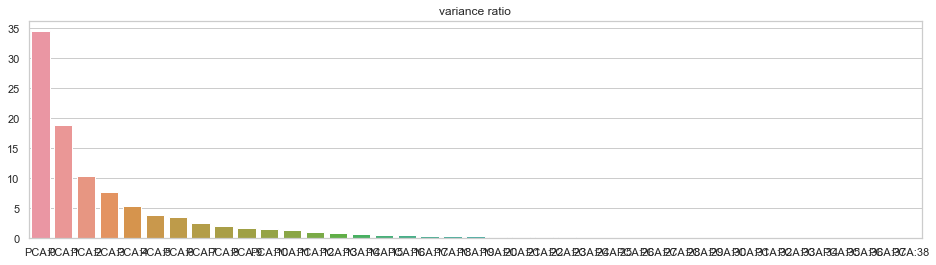

In [162]:
_plot(variance_percent , "variance ratio")

## 4.2 PCA Dimensional Reduction (4 Components)
---

In [172]:
n_pca = PCA(n_components=4)
interested_pca = n_pca.fit_transform(df_with_dummy)

> Eigen values

In [173]:
interested_variance_r = n_pca.explained_variance_ratio_ * 100
interested_variance_r

array([34.51105941, 18.95336327, 10.43792531,  7.77127588])

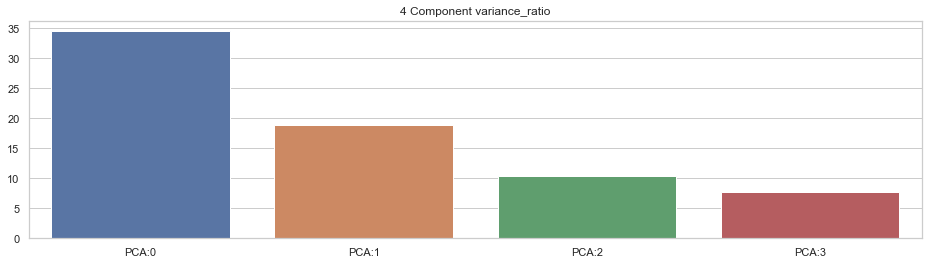

In [174]:
_plot(interested_variance_r , "4 Component variance_ratio")

In [175]:
interested_pca

array([[ 4.23552831e-01, -2.14335112e+00,  1.21246903e-01,
         2.55406254e+00],
       [ 5.82594701e-01, -2.15455697e+00,  8.34232648e-02,
         2.55429739e+00],
       [ 8.31394033e-01, -1.22277198e+00, -1.03772566e+00,
        -7.50525400e-01],
       [-4.46783421e-01, -5.57924867e-01, -2.11834810e-01,
        -7.93304087e-01],
       [ 1.08171918e+00, -9.85624976e-01, -9.28268605e-02,
        -1.07583627e+00],
       [ 2.13056537e-01, -1.30534195e+00, -4.39566798e-01,
        -8.43296264e-01],
       [ 8.38049186e-01, -2.21399442e-01,  2.45931535e-01,
        -1.51187110e+00],
       [ 9.89465224e-01, -2.59760032e-01,  2.50986731e-01,
        -1.42835195e+00],
       [ 1.96252923e+00, -4.37314625e-01,  7.86274686e-02,
        -1.74768361e+00],
       [ 1.65409328e+00, -1.47565739e+00, -3.00118313e-01,
        -1.34673152e+00],
       [ 3.80076889e-01, -1.26343322e+00,  1.13299392e+00,
         6.92606723e-01],
       [ 5.65349459e-01, -3.77549084e-01,  1.82284892e+00,
      

In [197]:
test_df = pd.DataFrame(data=interested_pca ,columns=["PCA1","PCA2","PCA3","PCA4"] )

In [198]:
test_df

,PCA1,PCA2,PCA3,PCA4
0,0.423553,-2.143351,0.121247,2.554063
1,0.582595,-2.154557,0.083423,2.554297
2,0.831394,-1.222772,-1.037726,-0.750525
3,-0.446783,-0.557925,-0.211835,-0.793304
4,1.081719,-0.985625,-0.092827,-1.075836
...,...,...,...,...
200,1.820933,0.770574,1.360505,-0.486262
201,2.741244,0.486700,1.243535,-0.572308
202,2.647377,0.118650,1.907045,-0.284510
203,1.547944,3.101681,-1.768488,-0.314160


In [199]:
norm_pca = std_scaler.fit_transform(test_df)

In [202]:
test_df[test_df.columns] = norm_pca
test_df

,PCA1,PCA2,PCA3,PCA4
0,0.200152,-1.366726,0.104183,2.543412
1,0.275308,-1.373872,0.071682,2.543646
2,0.392879,-0.779711,-0.891675,-0.747396
3,-0.211130,-0.355766,-0.182021,-0.789996
4,0.511172,-0.628492,-0.079762,-1.071350
...,...,...,...,...
200,0.860491,0.491363,1.169027,-0.484235
201,1.295388,0.310349,1.068519,-0.569922
202,1.251031,0.075658,1.638646,-0.283323
203,0.731489,1.977813,-1.519590,-0.312850


In [204]:
test_df.describe()

,PCA1,PCA2,PCA3,PCA4
count,2.050000e+02,2.050000e+02,2.050000e+02,2.050000e+02
mean,3.791005e-17,2.112132e-17,-6.065609e-17,-5.957294e-18
std,1.002448e+00,1.002448e+00,1.002448e+00,1.002448e+00
min,-1.957379e+00,-2.067287e+00,-2.334593e+00,-2.216195e+00
25%,-7.783358e-01,-6.044590e-01,-5.756518e-01,-6.585712e-01
50%,-1.564551e-01,-1.839394e-02,6.148722e-02,-5.350584e-02
75%,7.911644e-01,4.658406e-01,5.664009e-01,6.705498e-01
max,2.735926e+00,2.568401e+00,2.747010e+00,3.063158e+00


<AxesSubplot:>

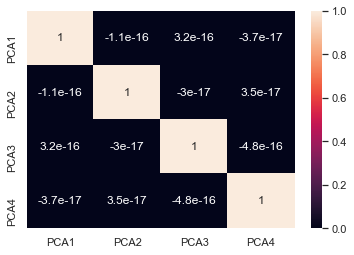

In [206]:

sns.heatmap(test_df.corr(),annot=True )

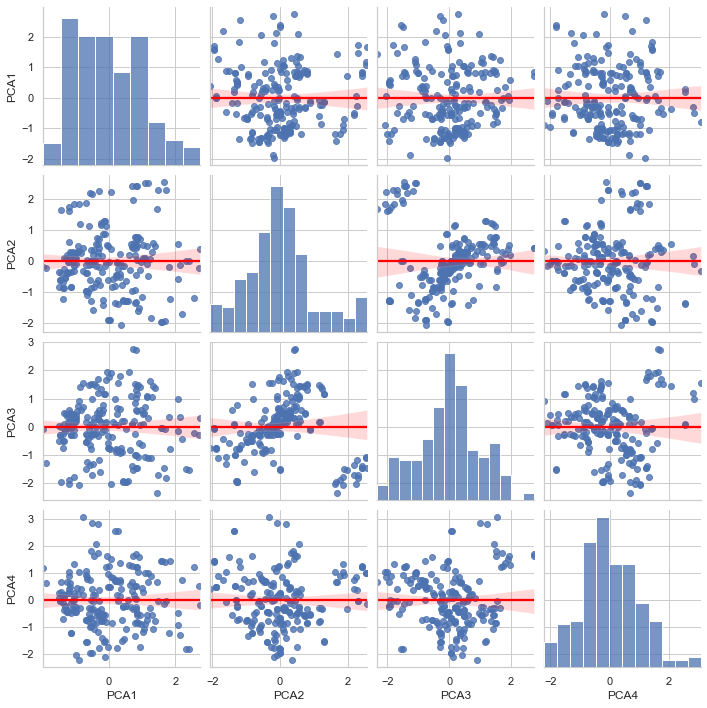

In [220]:
sns.pairplot(test_df , kind='reg' ,
            plot_kws={"line_kws": {"color":"red"}}
)

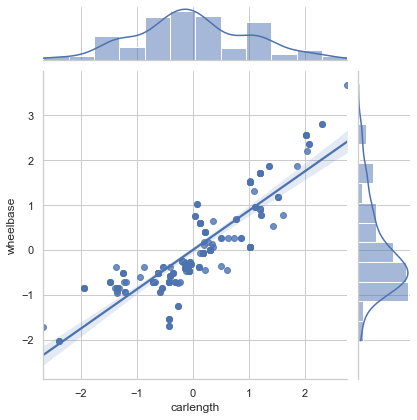

In [238]:
#Original Data
sns.jointplot(data=only_numeric ,x="carlength" , y="wheelbase" ,kind='reg' )

# 4.3 Linear Regression